In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns

In [39]:
df_data = pd.read_csv("../examples_0411/gdm_first_trimester_ml_dataset.csv")
df_data.head()

,age_years,bmi_prepreg_kg_m2,systolic_bp_mmHg,diastolic_bp_mmHg,map_mmHg,gestational_weeks,fpg_mmol_l,hba1c_percent,insulin_uIU_ml,homa_ir,triglycerides_mmol_l,hdl_mmol_l,parity,family_history_t2d,previous_gdm,pcos,smoking_first_trimester,physical_activity_level,diet_score_0_100,label_gdm
0,26.8,26.9,119.0,57.0,77.7,8.7,4.10,5.33,7.8,1.42,1.37,1.36,0,0,1,0,1,2.0,62.0,0
1,22.6,27.3,NaN,69.0,80.8,9.0,3.53,5.73,7.2,1.12,1.13,1.60,0,1,0,1,0,1.0,42.0,0
2,29.9,33.1,103.0,84.0,89.9,10.3,4.45,NaN,4.3,0.86,1.27,1.16,0,1,0,0,0,1.0,72.0,0
3,26.3,23.6,112.0,69.0,83.3,12.2,4.79,4.69,13.7,2.91,1.22,1.73,0,0,0,0,0,0.0,81.0,0
4,31.9,31.0,117.0,69.0,84.9,8.9,NaN,5.12,9.5,2.23,2.45,1.50,1,0,0,0,0,2.0,53.0,0


In [40]:
df_data.dtypes

age_years                  float64
bmi_prepreg_kg_m2          float64
systolic_bp_mmHg           float64
diastolic_bp_mmHg          float64
map_mmHg                   float64
gestational_weeks          float64
fpg_mmol_l                 float64
hba1c_percent              float64
insulin_uIU_ml             float64
homa_ir                    float64
triglycerides_mmol_l       float64
hdl_mmol_l                 float64
parity                       int64
family_history_t2d           int64
previous_gdm                 int64
pcos                         int64
smoking_first_trimester      int64
physical_activity_level    float64
diet_score_0_100           float64
label_gdm                    int64
dtype: object

In [41]:
df_data = df_data.drop(columns=["parity", "family_history_t2d", "previous_gdm", "pcos",
                                "smoking_first_trimester", "label_gdm", "physical_activity_level"])

In [42]:
df_data = df_data.dropna()
df_data.shape

(912, 13)

In [43]:
df_data.columns

Index(['age_years', 'bmi_prepreg_kg_m2', 'systolic_bp_mmHg',
       'diastolic_bp_mmHg', 'map_mmHg', 'gestational_weeks', 'fpg_mmol_l',
       'hba1c_percent', 'insulin_uIU_ml', 'homa_ir', 'triglycerides_mmol_l',
       'hdl_mmol_l', 'diet_score_0_100'],
      dtype='object')

In [44]:
response = df_data['fpg_mmol_l'].values 
df_values = df_data.drop(columns=["fpg_mmol_l"])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_values, response, random_state=0)

In [46]:
params = {"n_estimators" : 1000,
    "criterion": 'friedman_mse',
    "min_samples_split": 5,
    "min_samples_leaf": 1
}

In [47]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('pls_score', PLSRegression())])

In [48]:
predictions = pipe.fit(X_train, y_train).predict(X_test)

In [49]:
r2_score(y_true=y_test, y_pred=predictions)

0.37309934550028434

In [50]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

0.49133354646638944

In [51]:
root_mean_squared_error(y_true=y_test, y_pred=predictions)

0.6130881305558216

In [52]:
df_predictions = pd.DataFrame()
df_predictions["prediction"] = predictions
df_predictions["real_value"] = y_test
df_predictions.corr(method="spearman")

,prediction,real_value
prediction,1.000000,0.230148
real_value,0.230148,1.000000


<Axes: xlabel='prediction', ylabel='real_value'>

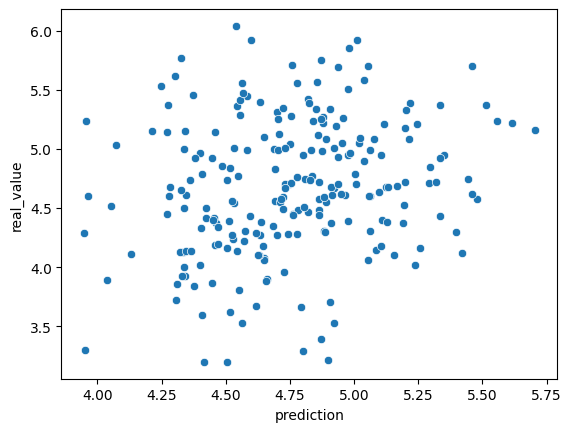

In [53]:
sns.scatterplot(data=df_predictions[df_predictions["prediction"]<10], x="prediction", y="real_value")